In [76]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = df1.merge(df2, on="Mouse ID")

# Display the data table for preview
df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [77]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_drug_grp = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_drug_df = pd.DataFrame(mean_drug_grp)

# Preview DataFrame
mean_drug_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [78]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_grp = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_err_df = pd.DataFrame(std_err_grp)

# Preview DataFrame
std_err_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977

In [79]:
# Minor Data Munging to Re-Format the Data Frames
mean_drug_df = mean_drug_df.reset_index().pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
std_err_df = std_err_df.reset_index().pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_drug_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


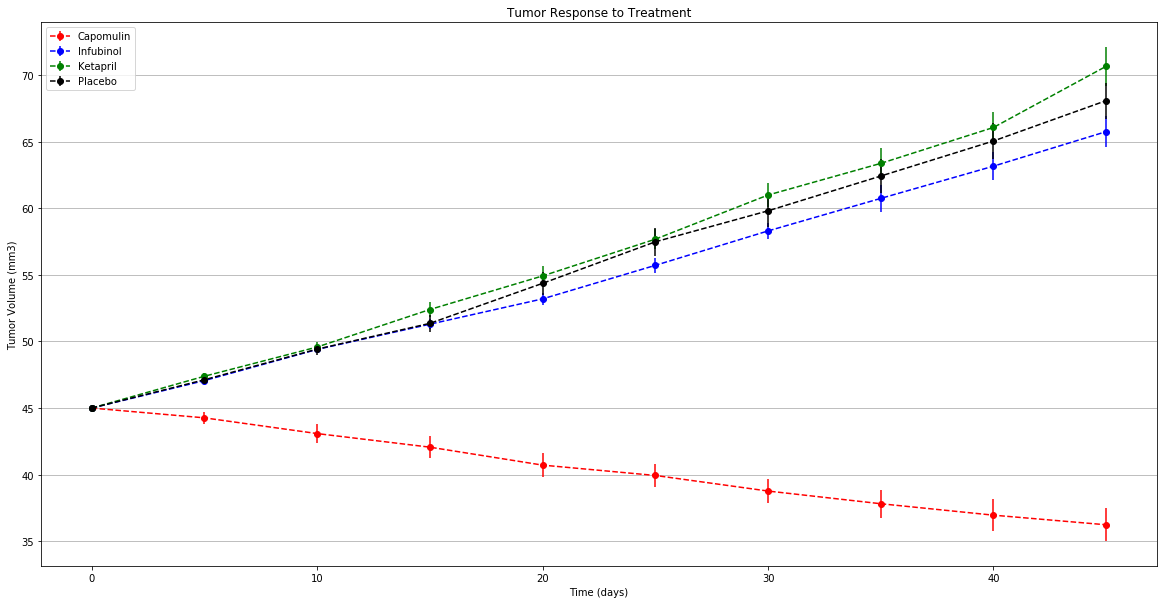

In [90]:
# Note to TAs: Run it twice to generate the "nicer" looking plot

# Generate the Plot (with Error Bars)
mean_drug_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].\
plot(kind='line', yerr = std_err_df, marker='o', linestyle="--", color =['r', 'b', 'g', 'black'])
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0, 50, step=10))
plt.rcParams["figure.figsize"] = (20,10)
plt.grid(axis='y')
plt.legend()

# Save the Figure
plt.savefig("treatment.png", dpi=100)

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [81]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metas_treat_mean = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
metas_treat_mean_df = pd.DataFrame(metas_treat_mean)

# Preview DataFrame
metas_treat_mean_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [82]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metas_treat_std = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().reset_index()

# Convert to DataFrame
metas_treat_df = pd.DataFrame(metas_treat_std)

# Preview DataFrame
metas_treat_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [83]:
# Minor Data Munging to Re-Format the Data Frames
metas_treat_df = metas_treat_df.reset_index().pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
metas_treat_mean_df = metas_treat_mean_df.reset_index().pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
metas_treat_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


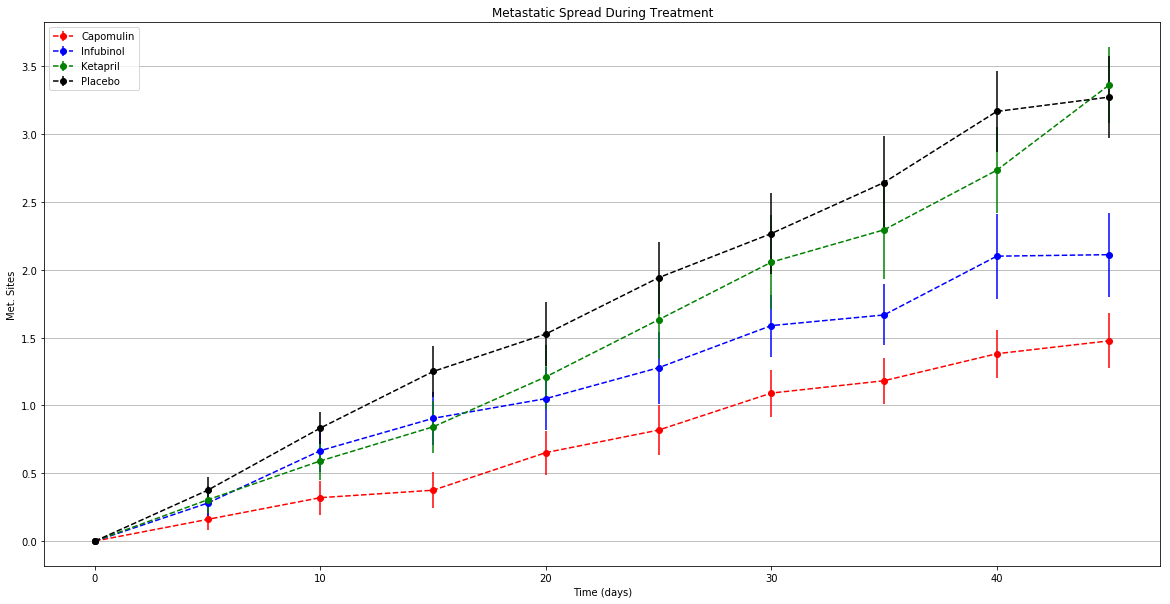

In [84]:
# Note to TAs: Run it twice to generate the "nicer" looking plot

# Generate the Plot (with Error Bars)
metas_treat_mean_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].\
plot(kind='line', yerr = metas_treat_df, marker='o', linestyle="--", colors=['r', 'b', 'g', 'black'])
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")
plt.xticks(np.arange(0, 50, step=10))
plt.rcParams["figure.figsize"] = (20,10)
plt.grid(axis='y')
plt.legend()

# Save the Figure
plt.savefig("spread.png", dpi=100)

# Show the Figure
plt.show()

## Survival Rates

In [85]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_group = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()

# Convert to DataFrame
survival_df = pd.DataFrame(survival_group).rename({"Mouse ID": "Mouse Count"}, axis=1)

# Preview DataFrame
survival_df.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [86]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = survival_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


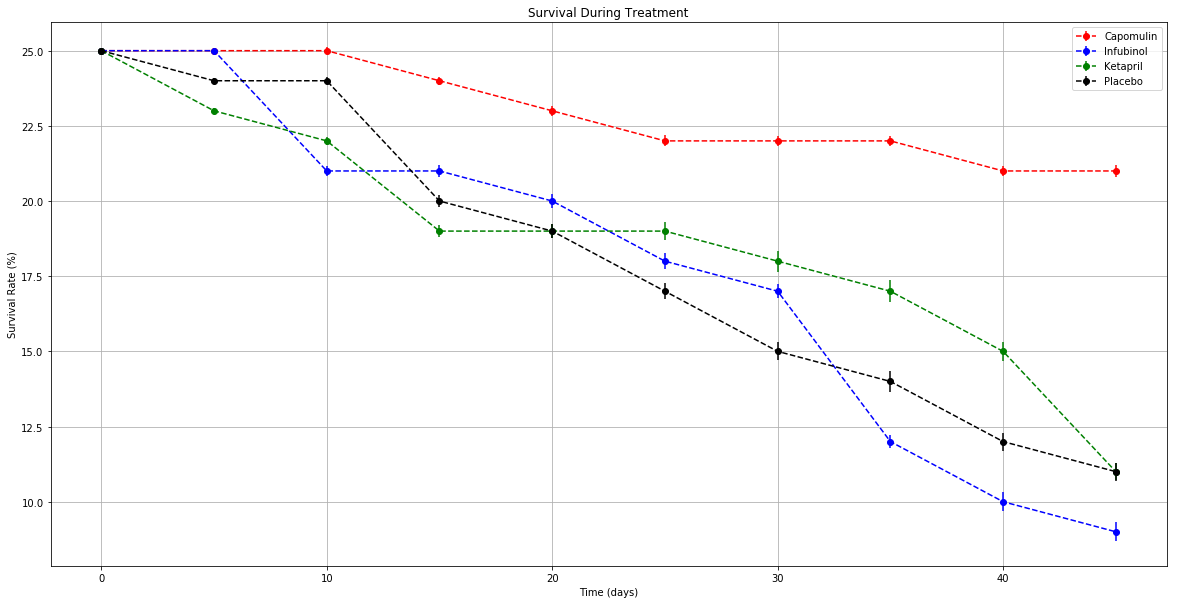

In [87]:
# Generate the Plot (Accounting for percentages)
survival_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].\
plot(kind='line', grid=True, yerr = metas_treat_df, marker='o', linestyle="--", color= ['r', 'b', 'g', 'black'])
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.xticks(np.arange(0, 50, step=10))
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()

# Save the Figure
plt.savefig("survival.png", dpi=100)

## Summary Bar Graph

In [88]:
# Calculate the percent changes for each drug
drugs_percent = (1 - (mean_drug_df.loc[45, [e for e in survival_df.columns]] / 
                     mean_drug_df.loc[0, [e for e in survival_df.columns]]))*-100

# Display the data to confirm
pd.DataFrame(drugs_percent.round(2))

,0
Drug,
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09


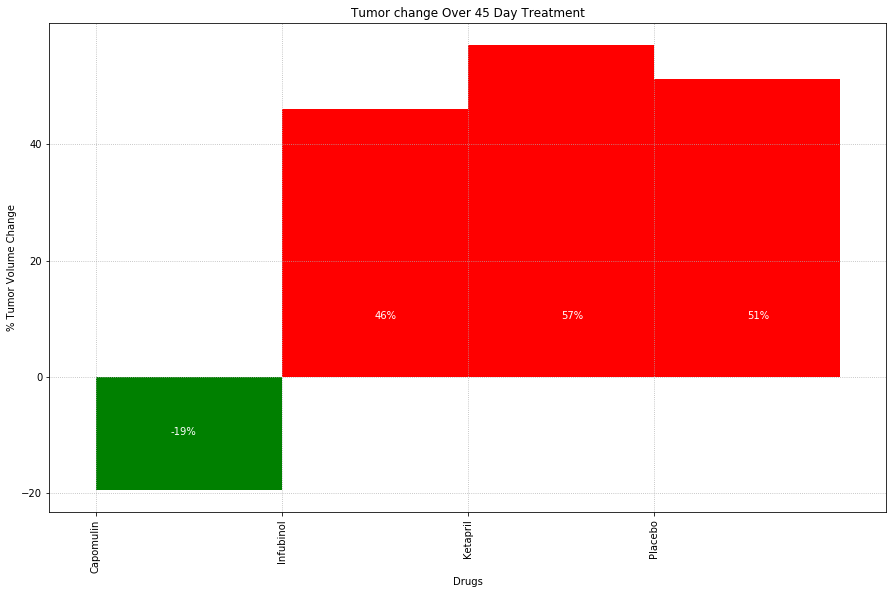

In [91]:
# Store all Relevant Percent Changes into a Tuple
drugs_tups = sorted(tuple(drugs_percent))
drugs_tups

# Splice the data between passing and failingdrugs
something = pd.cut(drugs_tups, [-22, 0, 57], 2 , labels=["passing", "failing"])
something

# Orient widths. Add labels, tick marks, etc. 
drugs_percent[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].\
                    plot(kind="bar", figsize = (15, 9), title ="Tumor change Over 45 Day Treatment", 
                    color = ['g', 'r', 'r', 'r'], grid=True, align='edge', width=1)
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drugs")
plt.grid(linestyle='dotted')
plt.yticks(np.arange(-20, 60, step=20))

# Use functions to label the percentages of changes
plt.text(0.4,-10,'-19%', color='white')
plt.text(1.5,10,'46%', color='white')
plt.text(2.5,10,'57%', color='white')
plt.text(3.5,10,'51%', color='white')

# Save the Figure
plt.savefig("tumor_change_45.png", dpi=100)

# Show the Figure
plt.show()